In [8]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('data/input.csv', header=None)
df

,0,1,2,3,4,5,6
0,0.100000,0.001322,0.003100,0.000810,0.001105,0.000000,0.000000
1,0.128571,0.662257,0.755500,0.001658,0.003424,0.784615,0.784615
2,0.128571,0.832272,0.997800,0.002236,0.004590,0.750000,1.000000
3,0.128571,0.994380,0.998420,0.002687,0.004684,0.584615,1.000000
4,0.128571,0.994535,0.998040,0.002914,0.005025,0.446154,0.000000
...,...,...,...,...,...,...,...
304,0.328571,0.002312,0.004410,0.000829,0.001106,0.000000,0.000000
305,0.314286,0.018657,0.050300,0.000857,0.001107,0.000000,0.000000
306,0.314286,0.002093,0.004500,0.000892,0.001108,0.000000,0.000000
307,0.314286,0.001991,0.004500,0.000892,0.001107,0.000000,0.000000


In [37]:
df_a = pd.read_csv('data/actions.csv', header=None)
df_a['actions'] = df_a[0].apply(lambda x: actions_dict[x])
df_a

,0,actions
0,3,ACTION_ADD_MEDIUM_VM
1,6,ACTION_REMOVE_LARGE_VM
2,6,ACTION_REMOVE_LARGE_VM
3,2,ACTION_REMOVE_SMALL_VM
4,5,ACTION_ADD_LARGE_VM
...,...,...
304,2,ACTION_REMOVE_SMALL_VM
305,4,ACTION_REMOVE_MEDIUM_VM
306,4,ACTION_REMOVE_MEDIUM_VM
307,0,ACTION_NOTHING


In [45]:
timesteps = 30
img = np.transpose(df.values, (1, 0))[:, :timesteps]

In [46]:
actions_dict = {
0:'ACTION_NOTHING',
1:'ACTION_ADD_SMALL_VM',
2:'ACTION_REMOVE_SMALL_VM',
3:'ACTION_ADD_MEDIUM_VM',
4:'ACTION_REMOVE_MEDIUM_VM',
5:'ACTION_ADD_LARGE_VM',
6:'ACTION_REMOVE_LARGE_VM'}

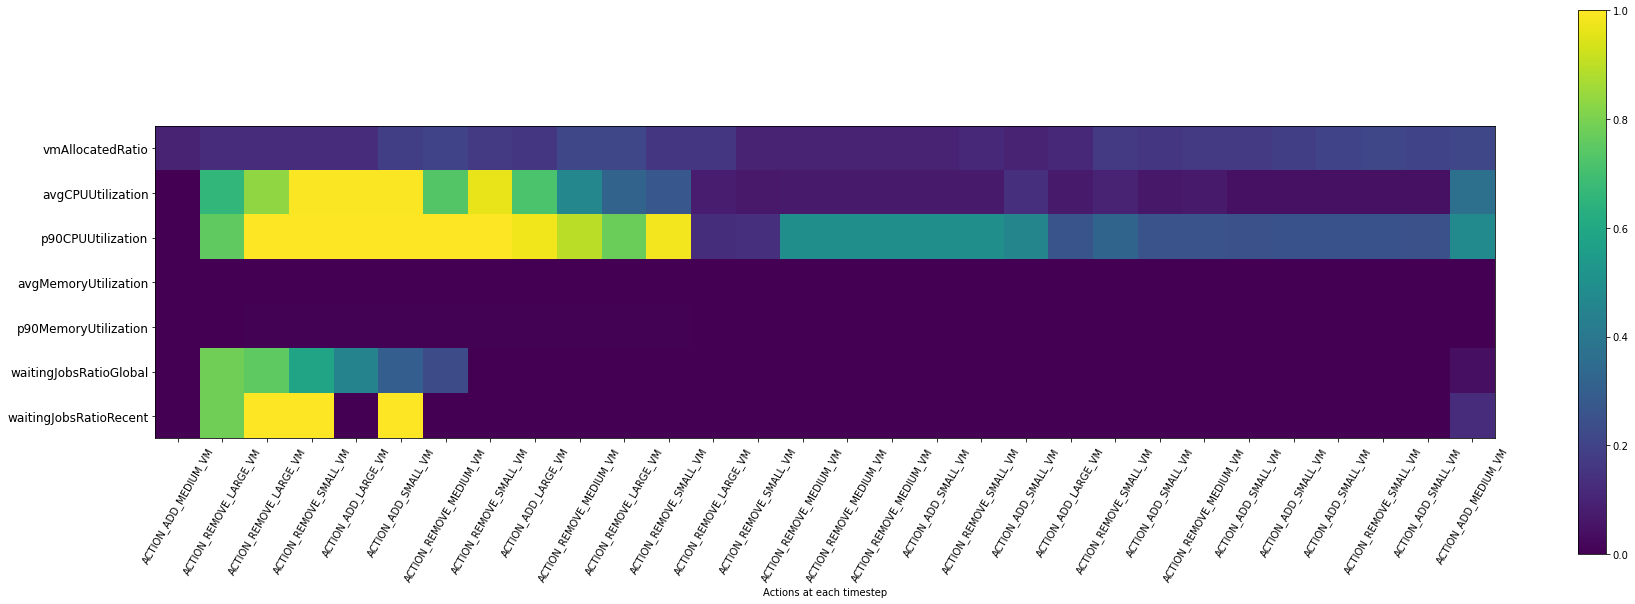

In [50]:
import matplotlib.pyplot as plt

features = [
"vmAllocatedRatio",
"avgCPUUtilization",
"p90CPUUtilization",
"avgMemoryUtilization",
"p90MemoryUtilization",
"waitingJobsRatioGlobal",
"waitingJobsRatioRecent"]

        
plt.figure(figsize=(30, 10))
plt.imshow(img)
plt.yticks(range(7), features, size='large')
plt.colorbar()
plt.xlabel('Actions at each timestep')
plt.xticks(range(timesteps), df_a['actions'].values[:timesteps], rotation=60)
plt.show()